In [1]:
import qiskit

In [2]:
import numpy as np
from scipy.linalg import expm
from qiskit import BasicAer
from qiskit import execute as q_execute
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import state_fidelity
from qiskit.aqua.operators import MatrixOperator, op_converter
from qiskit.aqua.components.initial_states import Custom

In [16]:
H = np.loadtxt('Hamfdbh.txt')

In [17]:
num_qubits = 3

index1 = []
index2 = []
index3 = []
index4 = []
index5 = []
index6 = []
index7 = []
index8 = []

for i in range(1,8): 
    evo_time=0+i*0.1
    a = H.reshape(8,8)
  
    qubitOp = MatrixOperator(matrix=a)

    state_in = Custom(num_qubits, state_vector=([1,0,0,0,0,0,0,0]))

    qubit_op = op_converter.to_weighted_pauli_operator(qubitOp)
    quantum_registers = QuantumRegister(qubit_op.num_qubits)

    circuit = state_in.construct_circuit('circuit', quantum_registers)
    circuit += qubit_op.evolve(None, evo_time, 
                               num_time_slices=3,
                               quantum_registers=quantum_registers,
                               expansion_mode='suzuki',expansion_order=3)

    backend = BasicAer.get_backend('statevector_simulator')
    job = q_execute(circuit, backend)
    circuit_execution_result = np.asarray(job.result().get_statevector(circuit))
    
    index1.append(circuit_execution_result[0])
    index2.append(circuit_execution_result[1])
    index3.append(circuit_execution_result[2])
    index4.append(circuit_execution_result[3])
    index5.append(circuit_execution_result[4])
    index6.append(circuit_execution_result[5])
    index7.append(circuit_execution_result[6])
    index8.append(circuit_execution_result[7])

In [18]:
print("index1:",index1)
print("index2:",index2)
print("index3:",index3)
print("index4:",index4)
print("index5:",index5)
print("index6:",index6)
print("index7:",index7)
print("index8:",index8)

index1: [(0.8599186841578091-0.470338879494834j), (0.4950789070677685-0.7781055657261424j), (0.04667431125046555-0.8299123269410282j), (-0.3212979786757796-0.6383932283336848j), (-0.49282605804197743-0.31025545841651525j), (-0.44525709131210633+0.007141074975225058j), (-0.24933010055428156+0.19372319643257496j)]
index2: [(0.08806999569282581+0.17655397093355524j), (0.30286283384822843+0.22743045877598578j), (0.5218323443877525+0.09357623857861433j), (0.6130739567382777-0.18533263659505536j), (0.5041061964894589-0.4898509865772173j), (0.2201618787753769-0.6808244561055756j), (-0.1275039182835287-0.6694151066738447j)]
index3: [(-0.01796388742231425+0.008313377388622607j), (-0.04963870213035551+0.058537035741657875j), (-0.04340567737740268+0.1580403841243639j), (0.04556567544202998+0.2667127418368981j), (0.21964919381724002+0.31476126891034184j), (0.4257572147799248+0.24242274389517413j), (0.5748513522069914+0.03941359637401501j)]
index4: [(-0.0005301579341736953-0.0012113322682840652j), 

In [19]:
abs1 = list(map(abs, index1))
probabilities1 = [number ** 2 for number in abs1]
abs2 = list(map(abs, index2))
probabilities2 = [number ** 2 for number in abs2]
abs3 = list(map(abs, index3))
probabilities3 = [number ** 2 for number in abs3]
abs4 = list(map(abs, index4))
probabilities4 = [number ** 2 for number in abs4]
abs5 = list(map(abs, index5))
probabilities5 = [number ** 2 for number in abs5]
abs6 = list(map(abs, index6))
probabilities6 = [number ** 2 for number in abs6]
abs7 = list(map(abs, index7))
probabilities7 = [number ** 2 for number in abs7]
abs8 = list(map(abs, index8))
probabilities8 = [number ** 2 for number in abs8]

In [20]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

Text(0, 0.5, 'Probability')

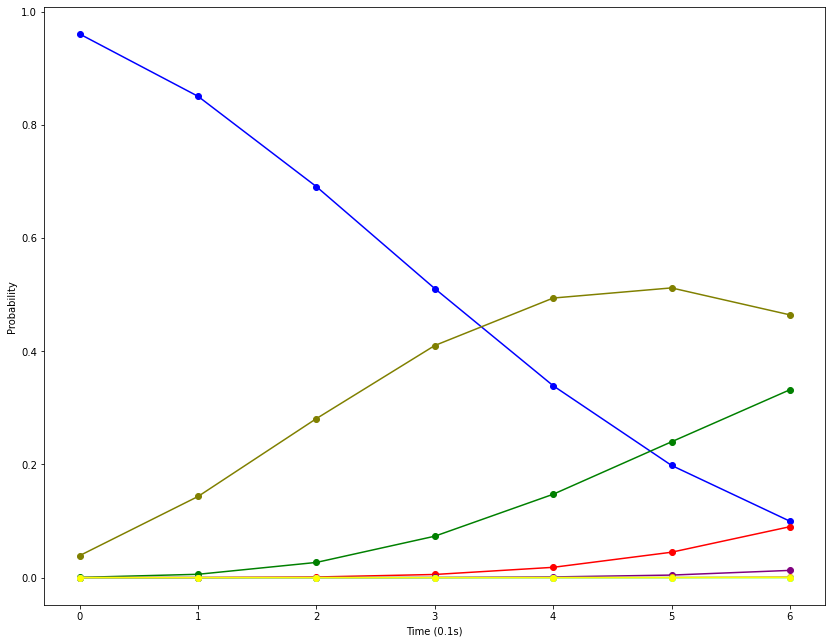

In [21]:
plt.figure(figsize=(14,11))

plt.plot(probabilities1, color='blue',marker='o')#changed
plt.plot(probabilities2, color='olive',marker='o')
plt.plot(probabilities3, color='green',marker='o')
plt.plot(probabilities4, color='red',marker='o')
plt.plot(probabilities5, color='purple',marker='o')#changed
plt.plot(probabilities6, color='orange',marker='o')#changed
plt.plot(probabilities7, color='cyan',marker='o')#changed
plt.plot(probabilities8, color='yellow',marker='o')#changed
plt.xlabel("Time (0.1s)")
plt.ylabel("Probability")
